# Custom Impedance Fitting Function
Borrowing from the PyEIS Library, this page demonstrates how to use the Electrochemical Spectroscopy fitting function

In [12]:
#PyEIS Library#
from PyEIS import *

In [13]:
#Locate the data, prepare for import of the MPT file

#EXAMPLE
path=r"C:\Users\cjang\Desktop\\"
data = ['DE_40_1_30.mpt']

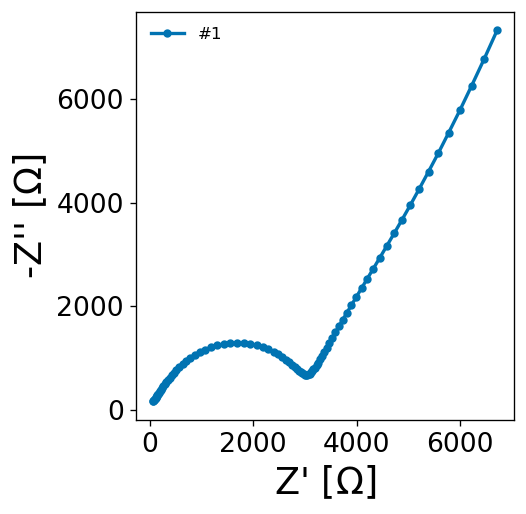

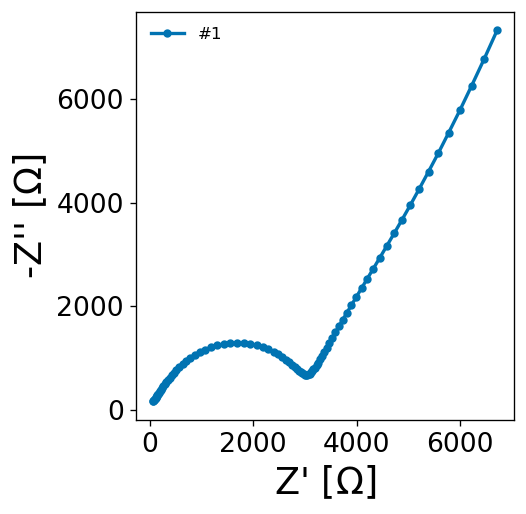

In [15]:
#WE WILL TREAT ONE ITEM AS AN EIS OBJECT, THE OTHER AS A DATAFRAME
mpt_data = importer(path, data, 10**6, 10**1.5)[0]

df = importer(path, data, 10**6, 10**1.5)[1]

In [11]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
mpt_data.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 299
    # data points      = 180
    # variables        = 7
    chi-square         = 187.645703
    reduced chi-square = 1.08465724
    Akaike info crit   = 21.4877798
    Bayesian info crit = 43.8384778
[[Variables]]
    Rs:   39.3265692 +/- 3.18321413 (8.09%) (init = 1000)
    R:    2957.94044 +/- 15.1757501 (0.51%) (init = 2959)
    n:    0.84601808 +/- 0.00304709 (0.36%) (init = 0.8)
    fs:   23050.4496 +/- 204.233584 (0.89%) (init = 23023)
    R2:   292960.600 +/- 102841.962 (35.10%) (init = 258738)
    n2:   0.71084396 +/- 0.00524106 (0.74%) (init = 0.8)
    fs2:  0.21678808 +/- 0.11603917 (53.53%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.812
    C(R, fs)   = -0.795
    C(R, n)    = -0.748
    C(n, fs)   =  0.677
    C(R, fs2)  =  0.663
    C(R, R2)   = -0.649
    C(fs, n2)  = -0.629
  

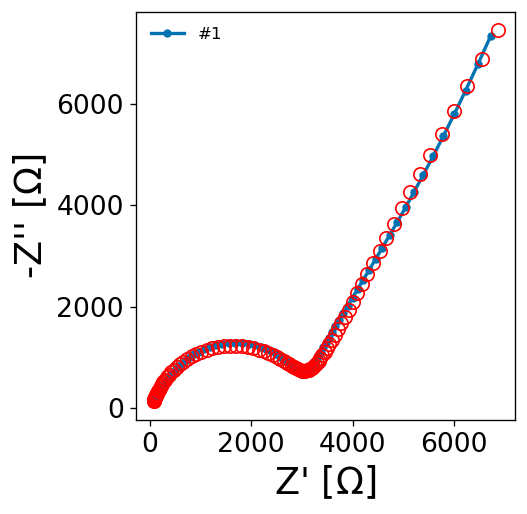

In [6]:
#PLOTS THE PREDICTIONS
mpt_data.EIS_plot(fitting = 'on')

cycle || No. RC-elements ||   u
[1]            7            0.84
cycle ||   u
[1]       0.71

number of RC-elements: [1] =  8
cycle || No. RC-elements ||   u
[1]            7            0.84


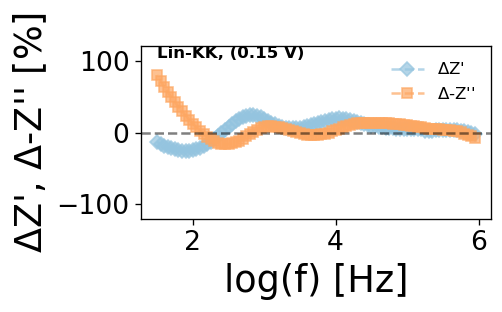

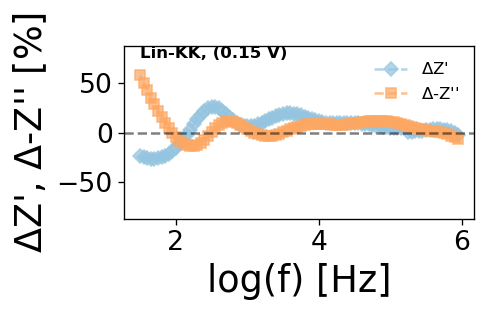

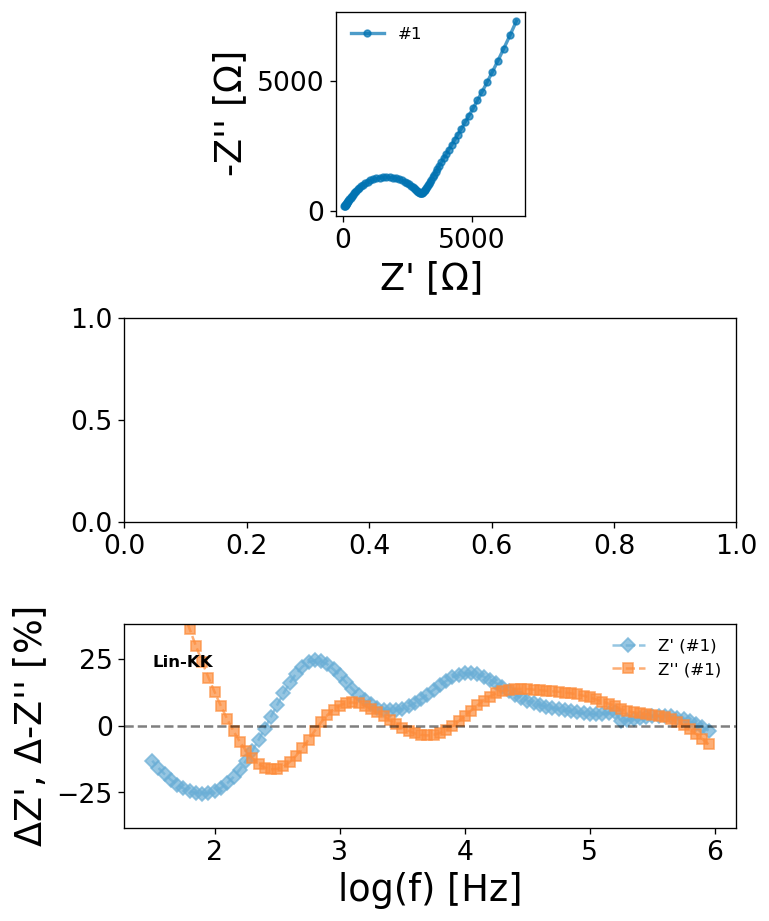

In [6]:
#THIS IS THE LINEAR KRAMER KRONIG ANALYSIS SECTION
#NOT NESSESCARY AT THE MOMENT, BUT THIS WILL HELP ADJUST THE MASK
#WILL HELP PREVENT WITH LONG FITTING PROCESSES

mpt_data.Lin_KK(legend='potential')
ex_num_RC=2
mpt_data.Lin_KK(legend='potential', num_RC = ex_num_RC)
print()
print('number of RC-elements: [1] = ',int(ex_num_RC*mpt_data.decade[0]))
mpt_data.Lin_KK(plot='w_data')

In [7]:
#FIRST BATCH OF FITTED COEFFICIENTS, PLUG BACK INTO THE GUESS FUNCTION TO GET EVEN BETTER BATCH

print(mpt_data.fit_Rs)
print()
print(mpt_data.fit_R)
print(mpt_data.fit_n)
print(mpt_data.fit_fs)
print()
print(mpt_data.fit_R2)
print(mpt_data.fit_n2)
print(mpt_data.fit_fs2)

[39.32656915622596]

[2957.94043621608]
[0.8460180781680591]
[23050.449596402752]

[292960.6000477159]
[0.7108439615239073]
[0.2167880767976767]


In [8]:
guess_package = [mpt_data.fit_Rs[0], mpt_data.fit_R[0], mpt_data.fit_n[0], mpt_data.fit_fs[0], mpt_data.fit_R2[0], mpt_data.fit_n2[0], mpt_data.fit_fs2[0]]
guess_package

[39.32656915622596,
 2957.94043621608,
 0.8460180781680591,
 23050.449596402752,
 292960.6000477159,
 0.7108439615239073,
 0.2167880767976767]

In [9]:
#input: A GUESS PACKAGE OF INITIAL VARIABLE COEFFICIENTS TO CALCULATE THRU CIRCUIT EQ
#output: A NEW GUESS PACKAGE THAT RAN THROUGH ONE ITERATION OF THE GUESS FUNCTION, Possibly use output for another iteration
def guess(guess_package):
    
    #SINGLE ITERATION OF THE GUESS PROCESS
    #USE THIS FUNCTION TO GET CLOSER TO THE IDEAL COEFFICIENTS FOR Rs, R, n, fs, R2, n2, fs2
    #REPEAT THIS FUNCTION UNTIL THE THRESHOLD IS ACHEIVED
    
    params = Parameters()
    
    #adding to the parameters package to send to the fitting function
    params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
    params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
    params.add('n', value=guess_package[2], min=.65, max=1.2)
    params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
    params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
    params.add('n2', value=guess_package[5], min=.65, max=1.2)
    params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)
    
    #Call to the fitting function given by PyEIS
    mpt_data.EIS_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
    
    #maybe take a look at the plots,may help for accuracy, don't really need it...
    #mpt_data.EIS_plot(fitting = 'on')
    
    
    #print out the values
    print(mpt_data.fit_Rs)
    print()
    print(mpt_data.fit_R)
    print(mpt_data.fit_n)
    print(mpt_data.fit_fs)
    print()
    print(mpt_data.fit_R2)
    print(mpt_data.fit_n2)
    print(mpt_data.fit_fs2)
    
    #export the new guess package
    guess_package =  ([mpt_data.fit_Rs[0],mpt_data.fit_R[0],mpt_data.fit_n[0],mpt_data.fit_fs[0],mpt_data.fit_R2[0],mpt_data.fit_n2[0],mpt_data.fit_fs2[0]])
    return guess_package

In [10]:
new_guess_package = [i for i in guess(guess_package)]

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 73
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419109
    reduced chi-square = 1.08334745
    Akaike info crit   = 21.2702869
    Bayesian info crit = 43.6209848
[[Variables]]
    Rs:   40.5540108 +/- 3.22584054 (7.95%) (init = 39.32657)
    R:    2955.51714 +/- 15.2671527 (0.52%) (init = 2957.94)
    n:    0.84660245 +/- 0.00308437 (0.36%) (init = 0.8460181)
    fs:   23059.2014 +/- 205.190001 (0.89%) (init = 23050.45)
    R2:   297046.521 +/- 106113.769 (35.72%) (init = 292960.6)
    n2:   0.71055166 +/- 0.00526438 (0.74%) (init = 0.710844)
    fs2:  0.21210157 +/- 0.11556621 (54.49%) (init = 0.2167881)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0.65

In [11]:
new_guess_package

[40.55401082755912,
 2955.517143035441,
 0.8466024537479868,
 23059.201374892775,
 297046.521081293,
 0.7105516646229146,
 0.21210157063379947]

In [12]:
guess_package

[39.32656915622596,
 2957.94043621608,
 0.8460180781680591,
 23050.449596402752,
 292960.6000477159,
 0.7108439615239073,
 0.2167880767976767]

In [13]:
#THIS VERIFIES WHETHER OR NOT WE'VE ACHEIVED A SATISFACTORY COEFFICIENT PACKAGE
#IF THIS DOESN'T RETURN TRUE, WE RUN THE GUESSER UNTIL IT DOES
def thresh_verif(before, after):
    try:
        total = 0
        for i in range(len(before)):
            total += (before[i] - after[i])
        print(total)    
        return abs(total) <= 1e-10
    except IndexError as e:
        #IF LISTS AREN'T THE SAME LENGTH
        print("Lists are not the same length")
        return

In [15]:
thresh_verif(guess_package, new_guess_package)

-4093.4725661303523


False

In [16]:
new_new_guess_package = guess(new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419106
    reduced chi-square = 1.08334743
    Akaike info crit   = 21.2702840
    Bayesian info crit = 43.6209819
[[Variables]]
    Rs:   40.5514933 +/- 3.22531176 (7.95%) (init = 40.55401)
    R:    2955.53961 +/- 15.2683097 (0.52%) (init = 2955.517)
    n:    0.84659873 +/- 0.00308444 (0.36%) (init = 0.8466025)
    fs:   23058.8992 +/- 205.194491 (0.89%) (init = 23059.2)
    R2:   296948.746 +/- 106195.658 (35.76%) (init = 297046.5)
    n2:   0.71055799 +/- 0.00526567 (0.74%) (init = 0.7105517)
    fs2:  0.21221114 +/- 0.11562734 (54.49%) (init = 0.2121016)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0.65

In [17]:
thresh_verif(new_guess_package, new_new_guess_package)

98.05727700068745


False

In [18]:
new_new_new_guess_package = guess(new_new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419106
    reduced chi-square = 1.08334743
    Akaike info crit   = 21.2702840
    Bayesian info crit = 43.6209819
[[Variables]]
    Rs:   40.5514933 +/- 3.22553524 (7.95%) (init = 40.55149)
    R:    2955.53961 +/- 15.2675965 (0.52%) (init = 2955.54)
    n:    0.84659873 +/- 0.00308439 (0.36%) (init = 0.8465987)
    fs:   23058.8992 +/- 205.190972 (0.89%) (init = 23058.9)
    R2:   296948.746 +/- 106132.845 (35.74%) (init = 296948.7)
    n2:   0.71055799 +/- 0.00526502 (0.74%) (init = 0.710558)
    fs2:  0.21221114 +/- 0.11560830 (54.48%) (init = 0.2122111)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0.650


In [19]:
thresh_verif(new_new_guess_package, new_new_new_guess_package)

5.863398655492347e-11


True

In [20]:
#ITERATIVE GUESSER
def guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess):
    guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
    new_guess = guess(guess_package)
    while not thresh_verif(guess_package, new_guess):
        guess_package = new_guess
        new_guess = guess(new_guess)
        print(new_guess)
    return new_guess

In [22]:
#CUMULATION OF THE FUNCTIONS FROM ABOVE

#GUESSES BROUGHT FROM INIT VALUES
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2


#COMPLETE FUNCTION
guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 305
    # data points      = 180
    # variables        = 7
    chi-square         = 187.419108
    reduced chi-square = 1.08334745
    Akaike info crit   = 21.2702863
    Bayesian info crit = 43.6209842
[[Variables]]
    Rs:   40.5523964 +/- 3.22549988 (7.95%) (init = 40)
    R:    2955.52973 +/- 15.2677357 (0.52%) (init = 2959)
    n:    0.84660033 +/- 0.00308441 (0.36%) (init = 0.8)
    fs:   23059.0310 +/- 205.191879 (0.89%) (init = 23023)
    R2:   296997.739 +/- 106150.423 (35.74%) (init = 258738)
    n2:   0.71055497 +/- 0.00526488 (0.74%) (init = 0.8)
    fs2:  0.21215566 +/- 0.11558855 (54.48%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(R2, fs2) = -1.000
    C(n2, fs2) =  0.925
    C(R2, n2)  = -0.914
    C(R, n2)   =  0.813
    C(R, fs)   = -0.797
    C(R, n)    = -0.749
    C(n, fs)   =  0.681
    C(R, fs2)  =  0.664
    C(R, R2)   = -0.650
    C(fs, n2)  = -0.629
    

[40.552342901104296,
 2955.5313262122336,
 0.8466001044798444,
 23059.01233883473,
 296984.9208669698,
 0.7105556425404013,
 0.21217071839671287]